<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

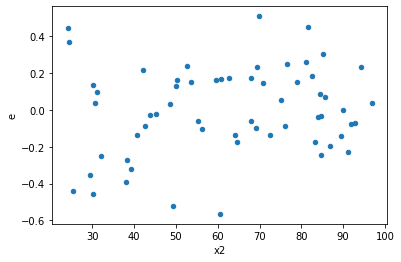

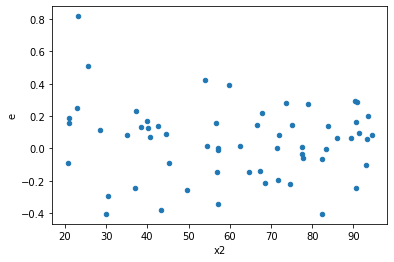

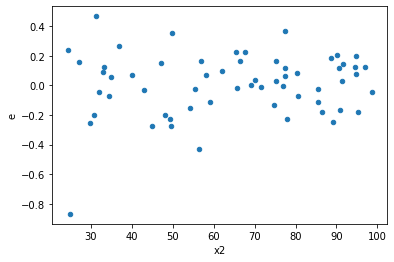

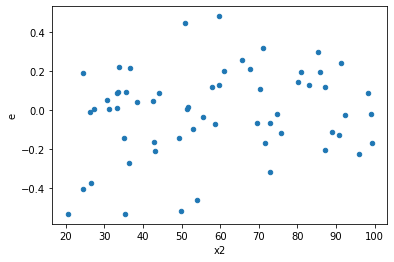

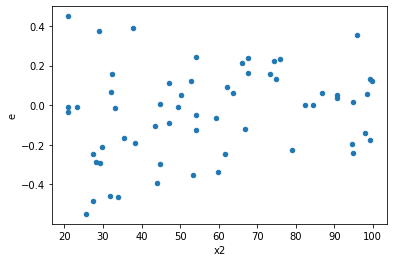

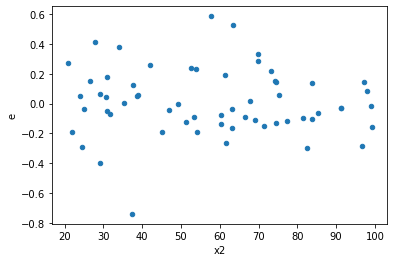

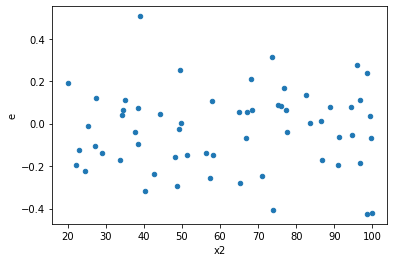

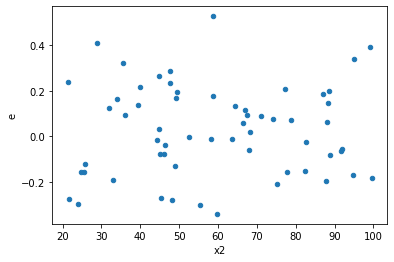

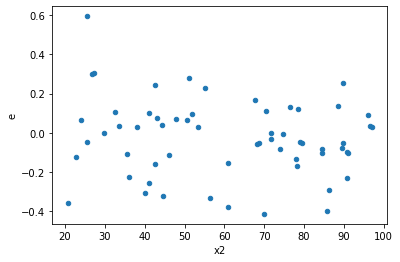

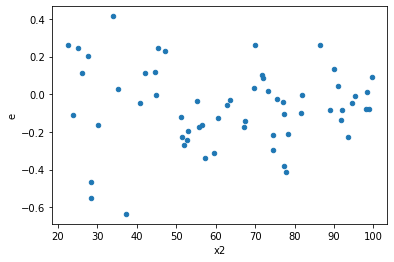

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,34.0,22.0,1.6844595431573126,1.3554598443307933,0.04954292773992096,0.06161181110594515,1.24360456510323,0.5990871507550577,0.7004564246224712,0.29954357537752885,Reject001=1 : Homoscedasticity
1.0,34.0,22.0,1.2145421780370793,1.6928091572718977,0.03572182876579645,0.07694587078508626,2.1540294392419717,0.062167291287264614,0.9689163543563677,0.031083645643632307,Reject001=1 : Homoscedasticity
2.0,28.0,28.0,0.7168676085922765,1.8645827705496947,0.025602414592581304,0.06659224180534624,2.601014117810684,0.013831783073097625,0.9930841084634512,0.006915891536548813,Reject001=1 : Homoscedasticity
5.0,31.0,25.0,1.3920760225727393,1.4869322196868289,0.04490567814750772,0.05947728878747315,1.3244937219765418,0.4750979989700621,0.762451000514969,0.23754899948503105,Reject001=1 : Homoscedasticity
7.0,22.0,34.0,0.5808187068225706,1.5939599154761344,0.02640085031011685,0.046881173984592184,1.7757448504083688,0.12881194662708362,0.9355940266864582,0.06440597331354181,Reject001=1 : Homoscedasticity
8.0,29.0,27.0,0.9726970637748149,1.1709410532475324,0.03354127806120051,0.04336818715731602,1.292979566198551,0.5048414935178045,0.7475792532410978,0.25242074675890225,Reject001=1 : Homoscedasticity
18.0,28.0,28.0,0.5883995398310415,2.7133465049781225,0.021014269279680056,0.09690523232064722,4.611401473490712,0.00012467632384027816,0.9999376618380799,6.233816192013908e-05,Reject001=0 : Heteroscedasticity
19.0,21.0,35.0,0.5099477652897398,2.138891880978358,0.02428322691855904,0.061111196599381655,2.516601142193172,0.015268194470200891,0.9923659027648996,0.0076340972351004455,Reject001=1 : Homoscedasticity
20.0,28.0,28.0,0.8374315464862176,1.6321697428702318,0.029908269517364916,0.058291776531079705,1.9490186985654638,0.08288413654024418,0.9585579317298779,0.04144206827012209,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,34.0,22.0,1.6844595431573126,1.3554598443307933,0.04954292773992096,0.06161181110594515,1.24360456510323,0.5990871507550577,Reject001=1 : Homoscedasticity
1.0,34.0,22.0,1.2145421780370793,1.6928091572718977,0.03572182876579645,0.07694587078508626,2.1540294392419717,0.062167291287264614,Reject001=1 : Homoscedasticity
2.0,28.0,28.0,0.7168676085922765,1.8645827705496947,0.025602414592581304,0.06659224180534624,2.601014117810684,0.013831783073097625,Reject001=1 : Homoscedasticity
3.0,32.0,24.0,1.6054382957980586,1.070403997806481,0.05016994674368933,0.044600166575270044,0.8889817404655729,0.7456056308955151,Reject001=1 : Homoscedasticity
4.0,31.0,25.0,2.047267086224021,0.7630692456008059,0.06604087374916197,0.030522769824032236,0.462179981748342,0.042475776180440135,Reject001=1 : Homoscedasticity
5.0,31.0,25.0,1.3920760225727393,1.4869322196868289,0.04490567814750772,0.05947728878747315,1.3244937219765418,0.4750979989700621,Reject001=1 : Homoscedasticity
6.0,29.0,27.0,1.1286319928208797,0.8883819966138177,0.03891834458003034,0.03290303691162288,0.8454377303731975,0.6565362018377803,Reject001=1 : Homoscedasticity
7.0,22.0,34.0,0.5808187068225706,1.5939599154761344,0.02640085031011685,0.046881173984592184,1.7757448504083688,0.12881194662708362,Reject001=1 : Homoscedasticity
8.0,29.0,27.0,0.9726970637748149,1.1709410532475324,0.03354127806120051,0.04336818715731602,1.292979566198551,0.5048414935178045,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      897
Reject001=0 : Heteroscedasticity    103
Name: Result_test, dtype: int64